In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Exploratory Data Analysis 

The   attached   logins.json   file   contains   (simulated)   timestamps   of   user   logins   in   a   particular geographic   location.   Aggregate   these   login   counts   based   on   15  minute   time   intervals,   and visualize   and   describe   the   resulting   time   series   of   login   counts   in   ways   that   best   characterize   the underlying   patterns   of   the   demand.   Please   report/illustrate   important   features   of   the   demand, such   as   daily   cycles.   If   there   are   data   quality   issues,   please   report   them.

In [147]:
with open('logins.json', 'r') as logs_file:
    pd.read_json

In [148]:
logins = pd.read_json('logins.json')
logins.shape

(93142, 1)

In [149]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [150]:
type(logins.login_time[0])

pandas._libs.tslib.Timestamp

In [151]:
logins.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [152]:
logins['log'] = 1
logins = logins.set_index('login_time')

In [153]:
logins.head()

,log
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [154]:
import datetime

In [155]:
logins15 = logins.resample('15T').sum().fillna(value=0)
logins15.head(10)

,log
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


In [156]:
logins15.shape

(9788, 1)

In [157]:
logins15.tail()

,log
login_time,
1970-04-13 17:45:00,5.0
1970-04-13 18:00:00,5.0
1970-04-13 18:15:00,2.0
1970-04-13 18:30:00,7.0
1970-04-13 18:45:00,6.0


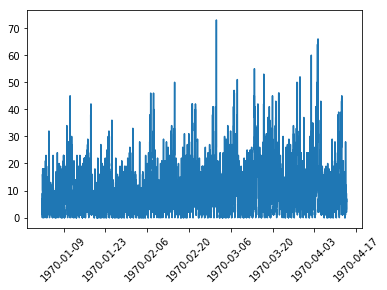

In [158]:
plt.plot(logins15)
plt.xticks(rotation=45)
plt.show()

In [159]:
logins15 = logins15.reset_index()
logins15['day_of_week'] = logins15.login_time.apply(lambda x: x.weekday())
logins15.head()

,login_time,log,day_of_week
0,1970-01-01 20:00:00,2.0,3
1,1970-01-01 20:15:00,6.0,3
2,1970-01-01 20:30:00,9.0,3
3,1970-01-01 20:45:00,7.0,3
4,1970-01-01 21:00:00,1.0,3


In [162]:
logins15 = logins15.set_index('login_time')

In [163]:
# create seperate df for each month
logins_jan = logins15['1970-01-01':'1970-01-31']
logins_feb = logins15['1970-02-01':'1970-02-28']
logins_mar = logins15['1970-03-01':'1970-03-31']
logins_apr = logins15['1970-04-01':'1970-04-30']

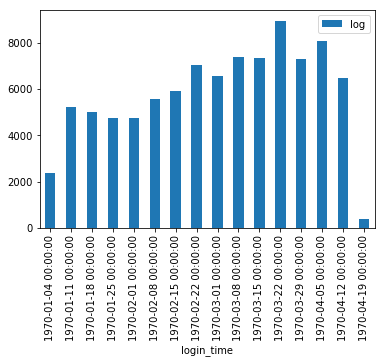

In [164]:
logins_wk = logins.resample('1W').sum().fillna(value=0)
logins_wk.plot(kind='bar')
plt.show()

The weekly number of rides shows that (except for the first and last weeks which are incomplete), on average the trend shows a gradual increase in the number of rides over the observed period. We can conclude that either demand from the location has increased, or that Ultimate has gained market share. Some weeks are particularly busy, which may be due to holidays or specific events concerning the specific location.

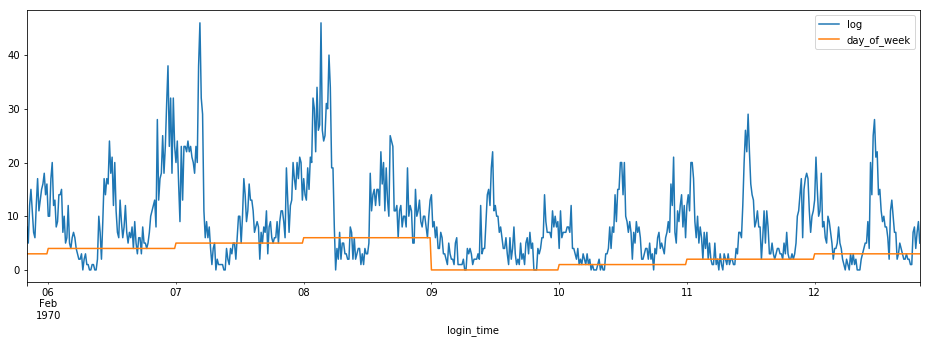

In [170]:
# look at a whole week of data in 15-minute intervals
wk = 5  # change this number to look at a different week
start = wk*168*4
end = (wk+1)*168*4
logins15[start:end].plot(figsize=(16,5))

plt.show()

A typical week shows the following patterns (the orange line shows the days of the week, starting with Monday (0) and ending with Sunday (6), and the blue line shows the number of rides accumulated over 15-minute intervals):
- The spikes in demand happen Friday night / Saturday early morning and Saturday night (until Sunday early morning), which would be consistent with people going out for the weekend. This late night spike is approx. 50 rides
- There is another spike on Sunday afternoon at approx 25 rides
- During the week days, there is a spike mid-day and another spike late in the evening at 20-30 rides; the spikes seem to increase during the week, being lower on Monday/Tuesday and higher on Wed-Fri

We can now look closer at a weekday and weekend pattern for different dates:

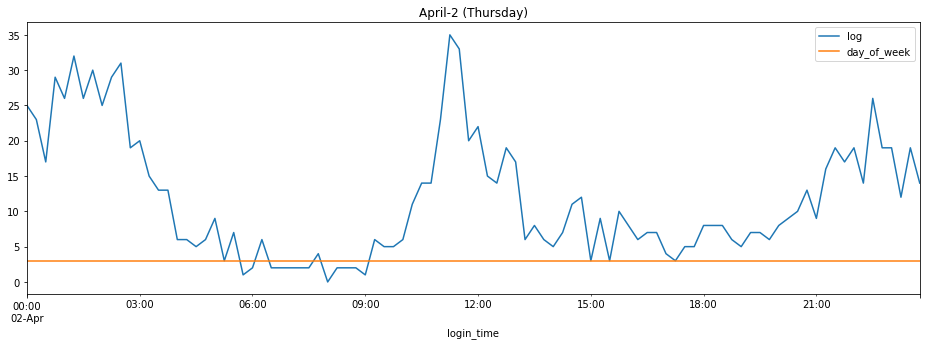

In [185]:
# week day plot
logins_apr.iloc[96:192,:].plot(figsize=(16,5))
plt.title('April-2 (Thursday)')
plt.show()

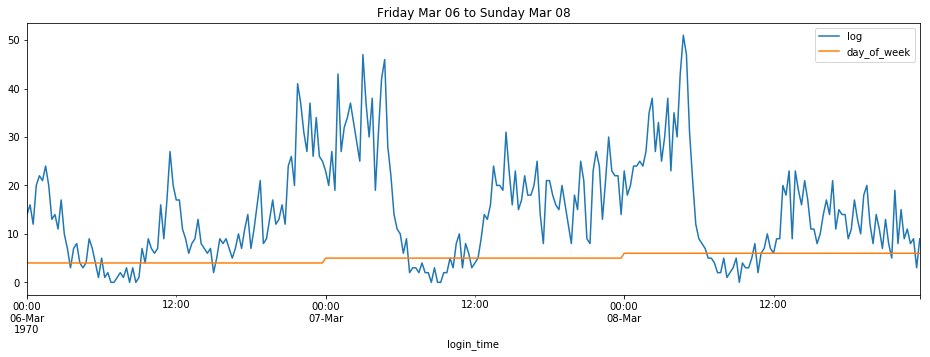

In [191]:
# Weekend plot
logins_mar.loc['1970-03-06':'1970-03-08',:].plot(figsize=(16,5))
plt.title('Friday Mar 06 to Sunday Mar 08')
plt.show()

__Monthly graphs:__

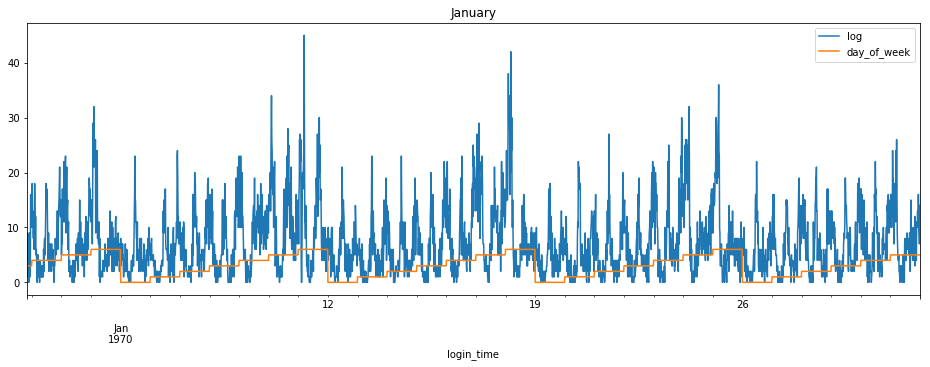

In [175]:
logins_jan.plot(figsize=(16,5))
plt.title('January')
plt.show()

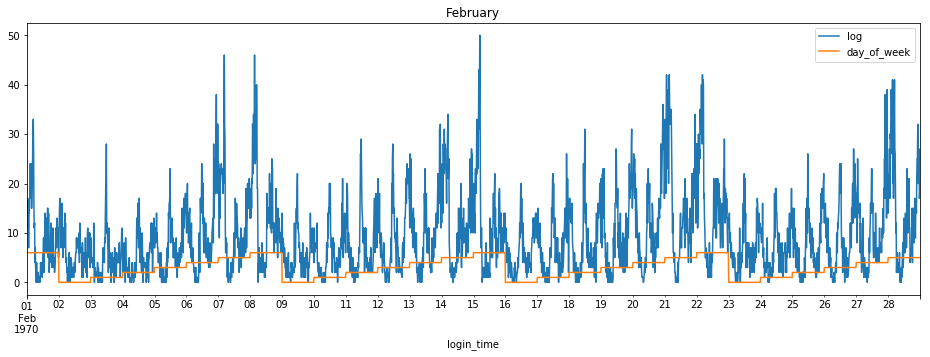

In [176]:
logins_feb.plot(figsize=(16,5))
plt.title('February')
plt.show()

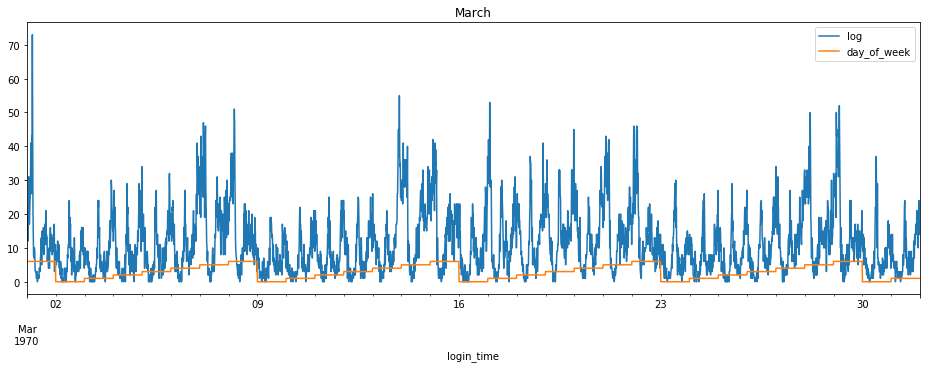

In [177]:
logins_mar.plot(figsize=(16,5))
plt.title('March')
plt.show()

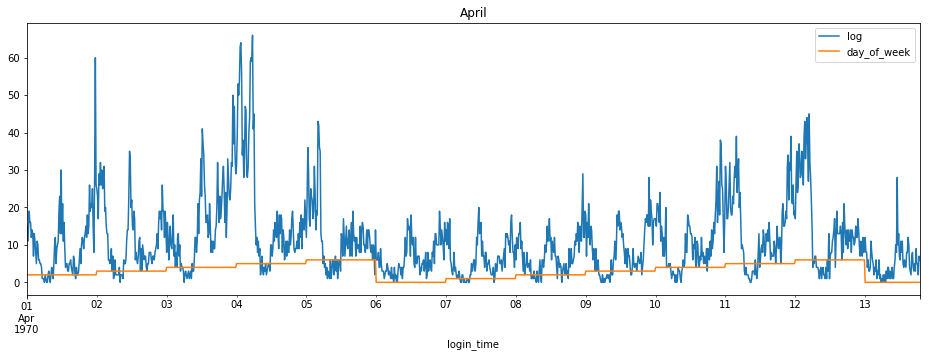

In [178]:
logins_apr.plot(figsize=(16,5))
plt.title('April')
plt.show()

The monthly data show (visually, without performing time series analysis), that the patterns are in the largest part repeated each month. A few exceptions however are observed:
- While the January and February peaks remain below 50, in March there is a spike >70 (observed only once on 1 Mar and may relate to a special event). In March and April the weekend peaks often reach or exceed 50 rides. WIth this in mind it should be noted that the y-scales for each graph are different
- April data is incomplete with only half the month observed. We note a busy Friday night 4 April and a quiet week from 5 - 12 April, which may point to a seasonal event such as a holiday week.

## Part 2: Experiemnt and metrics design 

The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active during   the   day .   On   weekends,   there   is   reasonable   activity   in   both   cities. 
 
However ,   a   toll   bridge,   with   a   two  ­way   toll,   between   the   two   cities   causes   driver   partners   to tend to   be   exclusive   to   each   city .   The   Ultimate   managers   of   city   operations   for   the   two   cities   have proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by  reimbursing   all   toll   costs. 

1. What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in 
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric?

2. Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on:

    a. how   you   will   implement   the   experiment 
    
    b. what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the observation 
    
    c. how   you   would   interpret   the   results   and   provide   recommendations   to   the   city operations   team   along   with   any   caveats. 

__ANSWER__

The goal of city managers here is to 'encourage driver partners to be available in both cities', therefore we are as yet not seeking financial metrics, but for an incentive that will encourage drivers to change their patterns of movement. Availability in both cities means they can pick up riders in both cities at different times of day - hence a good metric to use would be the number of ride starting points in each city. The current situation is that an average Gotham driver stays in Gotham and will therefore have all (or nearly all) rides starting from Gotham, whereas an average Metropolis driver will have (almost) all rides starting in Metropolis. By being available in both cities, drivers would start to collect rides in both cities and the ratio of Gotham to Metropolis rides would shift from a 0%/100% split to a more even ratio. Further, this metric is useful as it will allow Ultimate to measure the total number of rides of a Gotham/Metropolis driver and determine if the measure has also resulted in an increased number of rides per driver over a given period compared to the current situation. 

A practical experiemnt would be to perform a test over a limited time period (e.g. one month) where the drivers would be divided into two groups:
- a 'test' group of drivers from each city who would be offered the proposed reimbursment of toll fees
- a 'control' group of drivers from each city (i.e. simply the remaining drivers) who would remain on the existing platform of no reimbusment

The starting locations of rides for both driver groups would be monitored and the results collected at the end of the test period. For each group in both cities we would obtain a statistic for the proportion of rides starting from the other city. Hence we would have four distributions of the statistic, each with a mean and variance. A one-sided p-statistic can be used to determine if the difference between the distributions of the test and control groups for each city is statistically significant (one-sided as we are only interested in the increase of the ratio, and a significance threshold of e.g. 5% can be used). The p-test requires a sample size of >30, and it is assumed that we can assemble this many driver for both groups; if not a t-test may be used instead.

In addition, we can look at the distributions of the total number of rides for the test and control groups and see if there is a statistically signficant increase / decrease in the total number of rides over the period (this time a two-sided test).

This test would actually provide insight into a number of aspects:
- the crux of the experiemnt, i.e. if the toll reimbursment has initiated a shift in movement patterns
- whether the total volume of rides is increased as a result, or possibly decreased due to the time spent travelling between the two cities
- by separately looking separately at each day of the week, we can determine on which day the crossings are o most/least significant and adjust policy accordingly (e.g. offer the reimburment only on weekdays)
- by looking at each city, we can see if the crossings are more significant for one city that the other and conclude if there is a disbalance in supply and demand (e.g. if Gotham drivers consistently stay in Gotham and Metropolis drivers consistently cross over, and the Metropolis test group has a higher number of total rides than the control group, we can assume there is a lack of supply in Gotham)
- we can also search for outliers, e.g. drivers who cross over much more often than the average

In summary, the results to be communicated to the city operations team would be:
- statistical significance of the difference in ratio between the test and control groups and conclusion based on the pre-set significance threshold
- statistical significance of the change in the total number of rides between the test and control groups
- any other specific finding with respect to the movement patterns observed
- potential impact of the policy if applied to all drivers vs. only the test group - an important caveat here is that e.g. increasing the supply of drivers from Gotham may at some point cannibalize rides from Metropolis drivers, while only incuring cost to Ultimate for toll reimbursment - hence understanding the impact of the policy as the number of affected drivers increases is also a key aspect 
- recommendation on whether the policy is effective and potential changes to the policy that would have the same or higher impact, while being less expensive for Ultimate to implement

## Part 3: Predictive modeling 

Ultimate   is   interested   in   predicting   rider   retention.   T o   help   explore   this   question,   we   have provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account   in January   2014.   The   data   was   pulled   several   months   later;   we   consider   a   user   retained   if   they were   “active”   (i.e.   took   a   trip)   in   the   preceding   30   days. 

We   would   like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors 
for   retention,   and   offer   suggestions   to   operationalize   those   insights   to   help   Ultimate. 
 
The   data   is   in   the   attached   file   ultimate_data_challenge.json.   See   below   for   a   detailed description   of   the   dataset.   Please   include   any   code   you   wrote   for   the   analysis   and   delete   the dataset   when   you   have   finished   with   the   challenge. 
 
1. Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What fraction   of   the   observed   users   were   retained? 
2. Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what alternatives   you   considered,   and   any   concerns   you   have.   How   valid   is   your   model? Include   any   key   indicators   of   model   performance. 
3. Briefly   discuss   how   Ultimate   might   leverage   the   insights   gained   from   the   model   to improve   its   long­  term   rider   retention   (again,   a   few   sentences   will   suffice). 

In [192]:
import json

In [203]:
with open('ultimate_data_challenge.json', 'r') as ult_file:
    ultimatedf = pd.DataFrame(json.load(ult_file))


In [204]:
ultimatedf.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [206]:
ultimatedf['last_trip_date'] = pd.to_datetime(ultimatedf['last_trip_date'])
ultimatedf['signup_date'] = pd.to_datetime(ultimatedf['signup_date'])

In [207]:
# check data quality
ultimatedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


We have a total of 12 columns, of which 9 are complete, 2 have very few missing values and one column (avg_rating_of_driver) is approx. 84% complete. The average rating missing data can be filled by using the average of ratings. The phone used is a categorical entry and can be filled with existing entries, respecting the existing ratio between entries. 

We also converted the two date columns to datetime format.

In [208]:
ultimatedf.tail()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
49995,5.63,4.2,5.0,1.0,King's Landing,2014-06-05,iPhone,2014-01-25,0.0,0,False,100.0
49996,0.00,4.0,NaN,1.0,Astapor,2014-01-25,iPhone,2014-01-24,0.0,1,False,0.0
49997,3.86,5.0,5.0,1.0,Winterfell,2014-05-22,Android,2014-01-31,0.0,0,True,100.0
49998,4.58,3.5,3.0,1.0,Astapor,2014-01-15,iPhone,2014-01-14,0.0,2,False,100.0
49999,3.49,5.0,NaN,1.0,Astapor,2014-04-20,Android,2014-01-18,0.0,0,False,0.0


In [219]:
ultimatedf['avg_rating_by_driver'] = ultimatedf['avg_rating_by_driver'].fillna(value = ultimatedf['avg_rating_by_driver'].mean())
ultimatedf['avg_rating_of_driver'] = ultimatedf['avg_rating_of_driver'].fillna(value = ultimatedf['avg_rating_of_driver'].mean())

In [221]:
ultimatedf.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [222]:
# assess the impact of adding all 396 missing values to the more frequent category - iPhone
# missing values are only 1% of iPhone users -> adding these to iPhone will not distort the data
396/34592.0

0.011447733580018502

In [223]:
ultimatedf['phone'] = ultimatedf['phone'].fillna(value='iPhone')

In [224]:
ultimatedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


__EDA of data set to visualize relationships between features:__

Now all columns are complete and we can explore the distribution of individual features, correlations between features and prepare the data for predictive modeling.

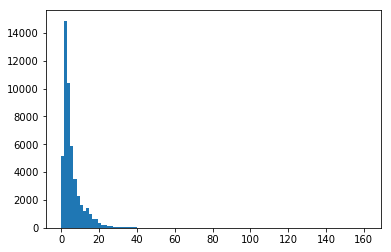

In [229]:
# histogram of average distance travelled
plt.hist(ultimatedf.avg_dist, bins=100)
plt.show()

There seems to be one or more outliers above 40 miles, need to look into it:

In [232]:
dist = ultimatedf.avg_dist.sort_values()
dist[-10:]

42835     70.48
19197     71.38
1493      72.08
22096     72.20
36625     73.88
47595     77.13
22290     79.34
1302      79.69
534      129.89
20701    160.96
Name: avg_dist, dtype: float64

Distances up to 80 miles are not uncommon, but the 129 miles and 160 miles are outliers that can be removed or kept depending on the algorithm used. If we use random forest or neural network classifiers to train and test the data, then outliers can be retained as these models can deal with extreme values.

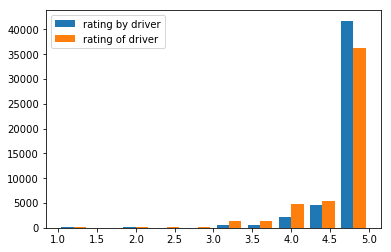

In [235]:
# average ratings:
plt.hist([ultimatedf.avg_rating_by_driver, ultimatedf.avg_rating_of_driver])
plt.legend(['rating by driver', 'rating of driver'])
plt.show()

Both the ratings by drivers of customers, and ratings of drivers by customers are heavily skewed towards positive ratings. This is a feature we need to preserve. This can mean that customers are genuinely satisfied with the service and Ultimate is doing a good job. But there may also be hidden incentives, such as customers that give high ratings are more likely to find a ride in very busy periods. In particular it seems that drivers are reluctant to give poor scores to customers as this may result in them getting fewer rides and jeopardizing earnings. 

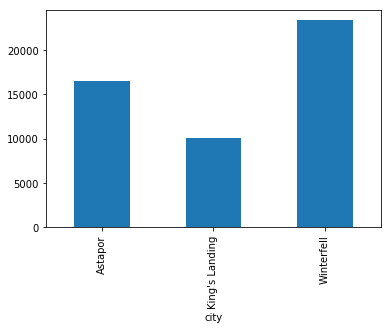

In [246]:
# distribution by city
city = ultimatedf.groupby('city')['avg_dist'].count()
city.plot('bar')
plt.show()

In [248]:
city_tot = city.sum()
city / city_tot

city
Astapor           0.33068
King's Landing    0.20260
Winterfell        0.46672
Name: avg_dist, dtype: float64

We now have a better picture of demand from the 3 cities: Winterfell accounts for 47% of rides, Astapor for 33% and King's Landing for 20%. 

In [213]:
# last trip dates - earliest values
ultimatedf.last_trip_date.sort_values()[:5]

31425   2014-01-01
10729   2014-01-01
40336   2014-01-01
34828   2014-01-01
37295   2014-01-01
Name: last_trip_date, dtype: datetime64[ns]

In [214]:
# last trip dates - latest values
ultimatedf.last_trip_date.sort_values()[-5:]

45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

The last trip dates range from Jan 1 to July 7 2014.

In [258]:
# signup dates
print 'Earliest signup date: \n', ultimatedf.signup_date.sort_values()[:5]
print 'Latest signup date: \n', ultimatedf.signup_date.sort_values()[-5:]

Earliest signup date: 
4674    2014-01-01
7672    2014-01-01
1431    2014-01-01
15387   2014-01-01
17482   2014-01-01
Name: signup_date, dtype: datetime64[ns]
Latest signup date: 
2013    2014-01-31
38728   2014-01-31
43123   2014-01-31
43127   2014-01-31
30220   2014-01-31
Name: signup_date, dtype: datetime64[ns]


Signup dates are all from January 2014, as indicated in the challenge synopsis. 

In [261]:
# look at surge
ultimatedf.avg_surge.describe()

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

In [263]:
ultimatedf.avg_surge.sort_values()[-10:]

10546    4.50
15334    4.50
1405     4.75
19191    5.00
21894    5.00
49383    5.00
47052    5.00
2817     5.00
30477    5.75
13861    8.00
Name: avg_surge, dtype: float64

In [266]:
np.percentile(ultimatedf.avg_surge, 99)

2.0

In [267]:
ultimatedf.avg_surge.mean() + 3 * ultimatedf.avg_surge.std()

1.7417718268483886

75% of surge values are distributed from 1.0 to 1.05, and only 1% are above 2.0. The highest value (8.0) is clearly an outlier. If we take values 3 standard deviations from the mean as outliers, any values above 1.74 should be removed. However surge is an important pricing feature and it may be significant in understanding rider retention. The fact that some rides are priced with a multiplier of 5x and above during very busy times is in itself a very important feature.

In [268]:
# surge perceent
ultimatedf.surge_pct.describe()

count    50000.000000
mean         8.849536
std         19.958811
min          0.000000
25%          0.000000
50%          0.000000
75%          8.600000
max        100.000000
Name: surge_pct, dtype: float64

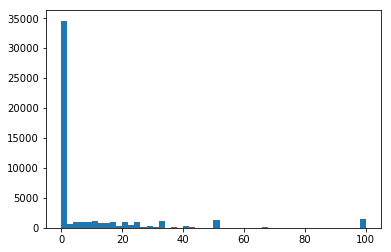

In [272]:
plt.hist(ultimatedf.surge_pct, bins=50)
plt.show()

Around 70% of rides have not experienced surge pricing, and the majority of those that have paid surge pricing have only done so for a small proportion of their rides. Only a handful of users have only ever paid surge pricing and never used the service under standard pricing. This is a significant feature for understanding pricing policy in relation to rider retention and should be kept.

In [275]:
# trips in first 30 days
ultimatedf.trips_in_first_30_days.describe()

count    50000.000000
mean         2.278200
std          3.792684
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        125.000000
Name: trips_in_first_30_days, dtype: float64

In [276]:
print ultimatedf.trips_in_first_30_days.sort_values()[-5:]

48804     58
29070     63
3030      71
99        73
18514    125
Name: trips_in_first_30_days, dtype: int64


The majority of users had no trips or up to 3 trips in the first 30 days. However there are regular users who ride several times per day and again these outliers should be kept to understand the relationship between heavy use and retention.

In [278]:
# proportion of Ultimate Black users
ultimatedf.ultimate_black_user.value_counts() / 50000.0

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

38% of all users are Ultimate Black users.

In [279]:
# percent of use on weekdays
ultimatedf.weekday_pct.describe()

count    50000.000000
mean        60.926084
std         37.081503
min          0.000000
25%         33.300000
50%         66.700000
75%        100.000000
max        100.000000
Name: weekday_pct, dtype: float64

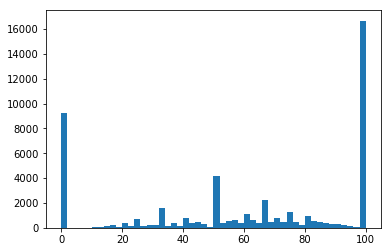

In [281]:
plt.hist(ultimatedf.weekday_pct, bins=50)
plt.show()

This is an interesting distribution, with just over half of all riders being either exclusively weekday users or exclusively weekend users. 

__Building a model to predict rider retention:__

The users signed up in January 2014 and the data was pulled on 1 July 2014, so approximately 6 months after the sign-up date. In order to determine predictors for rider retention after 6 months, first we need to see which users were "retained" from the January cohort. Ultimate's definition of a retained rider is one that took at least one ride in teh past 30 days. So we need to determine a True/False label for the 50,000 users, based on the condition that they took a ride on or after 1 June 2014. This will be the y-vector of labels.

To construct the X-matrix of features, we need to convert all features to numeric values and deal with categorical features by one-hot-encoding.

In [284]:
# consutruct the labels and determine proportion of retained riders
labels = ultimatedf.last_trip_date >= '2014-06-01'
labels.shape

(50000L,)

In [288]:
labels.sum() / float(len(labels))

0.37608000000000003

A total of 37.6% of the 50,000 January cohort users were retained after 6 months. 

In [309]:
# now construct the features matrix
# first drop the last trip date column

features = ultimatedf.drop('last_trip_date', axis=1)
features.shape


(50000, 11)

In [310]:
features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,Android,2014-01-27,11.8,14,False,82.4


In [311]:
features = pd.get_dummies(features)
features.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,3.67,5.0,4.7,1.10,2014-01-25,15.4,4,True,46.2,0,1,0,0,1
1,8.26,5.0,5.0,1.00,2014-01-29,0.0,0,False,50.0,1,0,0,1,0
2,0.77,5.0,4.3,1.00,2014-01-06,0.0,3,False,100.0,1,0,0,0,1
3,2.36,4.9,4.6,1.14,2014-01-10,20.0,9,True,80.0,0,1,0,0,1
4,3.13,4.9,4.4,1.19,2014-01-27,11.8,14,False,82.4,0,0,1,1,0


In [312]:
features = features.drop('signup_date', axis=1)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
city_Astapor              50000 non-null uint8
city_King's Landing       50000 non-null uint8
city_Winterfell           50000 non-null uint8
phone_Android             50000 non-null uint8
phone_iPhone              50000 non-null uint8
dtypes: bool(1), float64(6), int64(1), uint8(5)
memory usage: 3.0 MB


In [313]:
X = features.values
X

array([[3.67, 5.0, 4.7, ..., 0, 0, 1],
       [8.26, 5.0, 5.0, ..., 0, 1, 0],
       [0.77, 5.0, 4.3, ..., 0, 0, 1],
       ..., 
       [3.86, 5.0, 5.0, ..., 1, 1, 0],
       [4.58, 3.5, 3.0, ..., 0, 0, 1],
       [3.49, 5.0, 4.6015592912744685, ..., 0, 1, 0]], dtype=object)

In [314]:
X[1]

array([8.26, 5.0, 5.0, 1.0, 0.0, 0L, False, 50.0, 1, 0, 0, 1, 0], dtype=object)

In [315]:
X.shape

(50000L, 13L)

In [316]:
y = labels.values

In [317]:
y.shape

(50000L,)

The X and y and matching shapes and in np appay format as needed.

In [318]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [319]:
# split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [323]:
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(35000L, 13L)
(15000L, 13L)
(35000L,)
(15000L,)


The model used for predicting retention is the Random Forest Classifier. This is a suitable model as it can incorporate the variety of features we have in the data (some numerical and some categorical), deal with outliers and use all of the data to extract maximum model accuracy. This is an averaging method and as such will provide a stable model that will repeatedly return similar results with low variance. Further, the method uses sub-samples of the dataset to improve the predictive accuracy and control over-fitting, so cross-validation is not necessary. We will need to tune the hyperparameters to obtain the best overall results in terms of high accuracy without overfitting and satisfactory precision/recall scores that do a good job of predicting retention.

In [320]:
from sklearn.ensemble import RandomForestClassifier

In [321]:
from sklearn.metrics import precision_score, recall_score

In [343]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 10, min_samples_leaf = 2, max_features='log2')
rfc = rfc.fit(X_train, y_train)
train_score = rfc.score(X_train, y_train)
y_pred = rfc.predict(X_test)
test_score = rfc.score(X_test, y_test)
print 'Training score: ', train_score
print 'Test score: ', test_score
print 'Precision positive: ', precision_score(y_pred, y_test)
print 'Recall positive: ', recall_score(y_pred, y_test)
print 'Precision negative: ', precision_score(y_pred, y_test, pos_label=False)
print 'Recall negative: ', recall_score(y_pred, y_test, pos_label=False)

Training score:  0.8114
Test score:  0.7802
Precision positive:  0.639985770189
Recall positive:  0.738657359885
Precision negative:  0.864256771167
Recall negative:  0.800177707572


The above score is about the best that could be obtained by manually testing for different hyperparameters. The main one to tune is the max_depth: increasing the depth of trees e.g. to 50 overfits the training set with no real improvement in the test set. 

The critical scoring parameter is the Precision on positive labels, i.e. correctly predicting which riders will become retained. The precision score of 64% was achieved, meaning that 64% of captured positives are true positives, while the positive recall is 74% (i.e. 74% of all actual positives were captured by the model). This is a reasonably good result for a first attempt, and the result can probably be attributed to retaining all features of the data set, including outliers.

The Random Forest Classifier has the added benefit of showing the importance of features used in predicting results (a higher number indicates more importance):

In [345]:
# create a table of features and feature importance
fl = list(rfc.feature_importances_)
feats = list(features.columns)
feat_imp = pd.DataFrame(zip(feats, fl))
feat_imp.columns = ['feature', 'feature_importance']
feat_imp

,feature,feature_importance
0,avg_dist,0.060713
1,avg_rating_by_driver,0.172227
2,avg_rating_of_driver,0.033525
3,avg_surge,0.104943
4,surge_pct,0.134138
5,trips_in_first_30_days,0.067589
6,ultimate_black_user,0.056683
7,weekday_pct,0.112021
8,city_Astapor,0.030704
9,city_King's Landing,0.118342


One caveat with analyzing feature importances is that results will vary as hyperparameters are changed. However the results of the classification tend to be fairly consistent, so equivalent results can be achieved by the algorithm even if it chooses different features as 'more important'. In this result, we can observe teh following:
- Average rating by the driver is the single most important feature. This is surprising as most drivers rate customers with a '5', what may be the case is that more frequent users receive a wider variety of ratings and this is picked up by the model
- The two surge parameters are important (they relate to the same issue so there may be some co-linearity here). Users who paid a surge are retained at a rate of 58%, vs. 37% for other users (cell below). So it seems that retained users who are familiar with the service are willing to pay a premium during busy periods in order to get to their destination.
- King's Landing stands out among the cities as an important feature, with a very high retention rate. This may indicate a disbalance of supply/demand in the city or a specific policy that impacts that city and not others
- Weekday percentage is a significant classifier - some users with a zero percentage have likely not used Ultimate at all after signing in, so this is a strong indication that the user is not retained

In [357]:
# relationship between ratings and retention
driver_rated =  (ultimatedf.avg_rating_by_driver < 5.0).sum() 
driver_rated_and_retained = ((ultimatedf.avg_rating_by_driver < 5.0) & (ultimatedf.last_trip_date >= '2014-06-01')).sum()
driver_rated_and_retained / float(driver_rated)

0.55271729015447613

A rating strictly below 5.0 results in higher retention. Most likely a rating of 5.0 means the rider has only been rated few times and is therefore less likely to be a retained user.

In [350]:
# explore how surge affects retention
paid_surge =  (ultimatedf.avg_surge > 1.0).sum() 
paid_surge_and_retained = ((ultimatedf.avg_surge > 1.0) & (ultimatedf.last_trip_date >= '2014-06-01')).sum()
# ratio of users who paid a surge and are retained
paid_surge_and_retained / float(paid_surge) 

0.5818860156953557

In [353]:
# retention of King's Landing
kings_all = (ultimatedf.city == 'King\'s Landing').sum() 
kings_retained = ((ultimatedf.city == 'King\'s Landing') & (ultimatedf.last_trip_date >= '2014-06-01')).sum()
kings_retained / float(kings_all)

0.62813425468904249

In [355]:
print (ultimatedf.city == 'King\'s Landing').sum() 
print (ultimatedf.city == 'Astapor').sum() 
print (ultimatedf.city == 'Winterfell').sum() 

10130
16534
23336


In [356]:
print ((ultimatedf.city == 'King\'s Landing') & (ultimatedf.last_trip_date >= '2014-06-01')).sum() 
print ((ultimatedf.city == 'Astapor') & (ultimatedf.last_trip_date >= '2014-06-01')).sum() 
print ((ultimatedf.city == 'Winterfell') & (ultimatedf.last_trip_date >= '2014-06-01')).sum() 

6363
4228
8213


The distribution of retained users per city can be seen from the above cells: 
- King's Landing has a retention rate of 63% - significantly above the average of 38%. So a King's rider is by virtue of location likely to be a retained rider
- Astapor has a retention of only approx. 25%
- Winterfell has a retention rate of 35%

__Leveraging findings to improve long-term rider retention:__

King's Landing users have a very high retention rate. Any insights from this city in terms of policies or Ultimate's market position in the city may be leveraged to increase retention in other cities.

It seems that regular i.e. retained users do not mind paying a surge fee. However the surge may turn away occasional users. So carefully drafting the surge policy as a sensitve (even controversial) aspect of the business may have a strong impact on rider retention vs. short-term gains.

The rating system correlation with retention is counter-intuitive. Simply giving the rider a high rating dies not translate into retention, and giving a lower score to a rider who is already retained does not help the rider's future retention. So there is room for improving the scoring system so it encourages retention. 